In [2]:
import pandas as pd
import numpy as np
import seaborn as sns



In [4]:
#Reading Data
insurance = pd.read_csv("insurance.csv")
#We make a copy to protect the raw data.
ins = insurance.copy()

ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
# Checking if there is a null value in the data.
ins.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#Various pieces of information related to the data
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
bmi_column = ins['bmi']
print(bmi_column)

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64


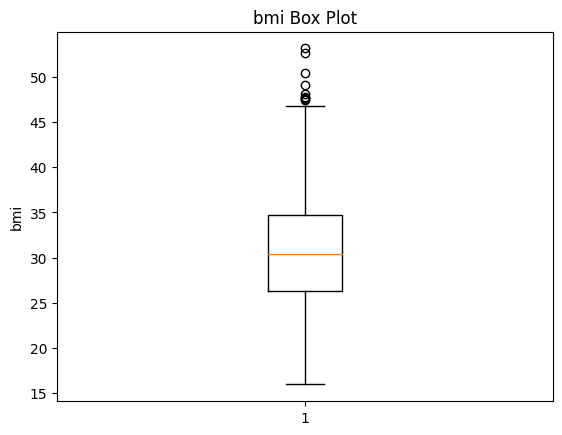

In [9]:
#We observe that BMI values are concentrated between 25 and 35. There are outliers above 45.
import matplotlib.pyplot as plt

plt.boxplot(bmi_column)
plt.ylabel('bmi')
plt.title('bmi Box Plot')
plt.show()


In [10]:
#Converting the 'smoker' values from 'yes' and 'no' to numerical values.
ins['smoker'] = insurance['smoker'].map({'yes': 1, 'no': 0})

In [11]:
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [12]:
#We are converting the transformed numerical value to a category.
ins['smoker'] = ins['smoker'].astype('category')

In [13]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   object  
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   object  
 6   charges   1338 non-null   float64 
dtypes: category(1), float64(2), int64(2), object(2)
memory usage: 64.3+ KB


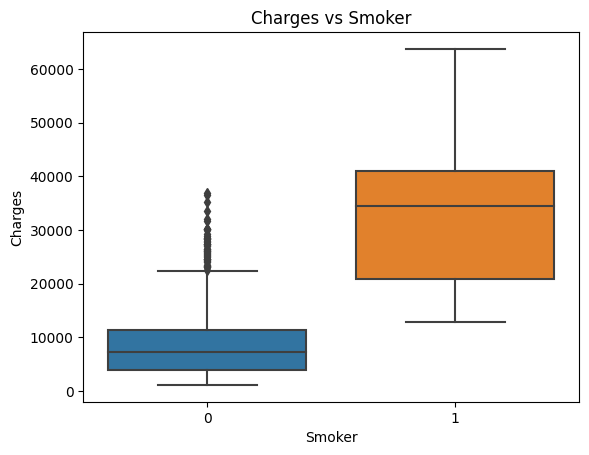

In [14]:
#We can see the relationship between Charges and Smoker. It's evident that costs are much higher for smokers.
sns.boxplot(x='smoker', y='charges', data=ins)
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges vs Smoker')
plt.show()

In [15]:
#From here, we can also see the difference between them.
average_charges_by_smoker = ins.groupby('smoker')['charges'].mean()
median_charges_by_smoker = ins.groupby('smoker')['charges'].median()
print(average_charges_by_smoker)
print(median_charges_by_smoker)


smoker
0     8434.268298
1    32050.231832
Name: charges, dtype: float64
smoker
0     7345.40530
1    34456.34845
Name: charges, dtype: float64


In [16]:
#We observe a strong relationship between Charges and Smoker.
correlation = ins['charges'].corr(ins['smoker'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.787251430498478


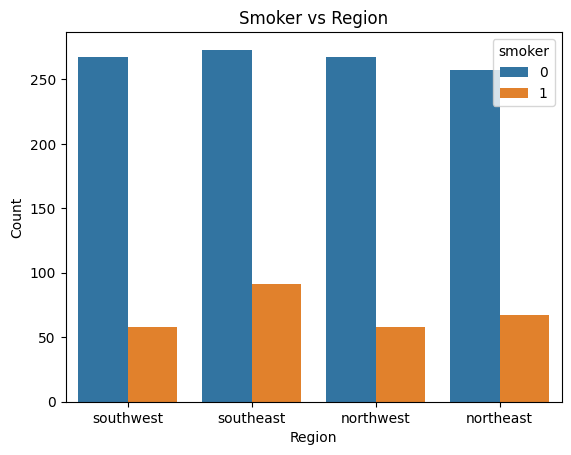

In [17]:
#When comparing Smoker vs Region, we observe that the highest number of smokers is in the Southeast region.
sns.countplot(x='region', hue='smoker', data=ins)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Smoker vs Region')
plt.show()

In [18]:
#From here, numerical value can also be observed.
cross_table = pd.crosstab(ins['smoker'], ins['region'])
print(cross_table)

region  northeast  northwest  southeast  southwest
smoker                                            
0             257        267        273        267
1              67         58         91         58


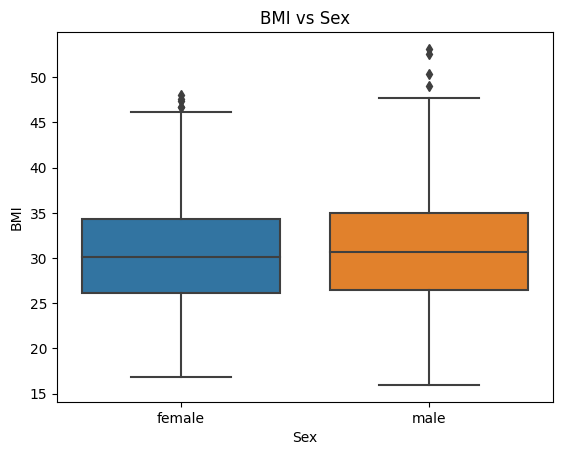

In [19]:
#We observe that gender does not have a significant impact on the BMI value.
sns.boxplot(x='sex', y='bmi', data=ins)
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.title('BMI vs Sex')
plt.show()

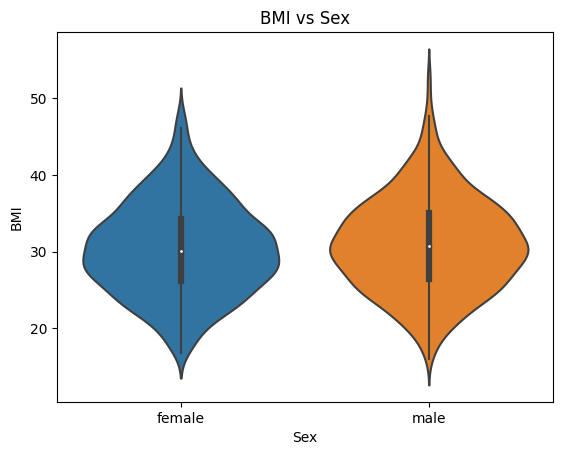

In [20]:
sns.violinplot(x='sex', y='bmi', data=ins)
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.title('BMI vs Sex')
plt.show()

In [21]:
bmi_summary_by_sex = ins.groupby('sex')['bmi'].describe()
print(bmi_summary_by_sex)

        count       mean       std     min     25%      50%       75%    max
sex                                                                         
female  662.0  30.377749  6.046023  16.815  26.125  30.1075  34.31375  48.07
male    676.0  30.943129  6.140435  15.960  26.410  30.6875  34.99250  53.13


In [22]:
children_by_region = ins.groupby('region')['children'].sum()
# Find the region with the most children
most_children_region = children_by_region.idxmax()
most_children_count = children_by_region.max()
print(most_children_region)

most_children_count

southeast


382

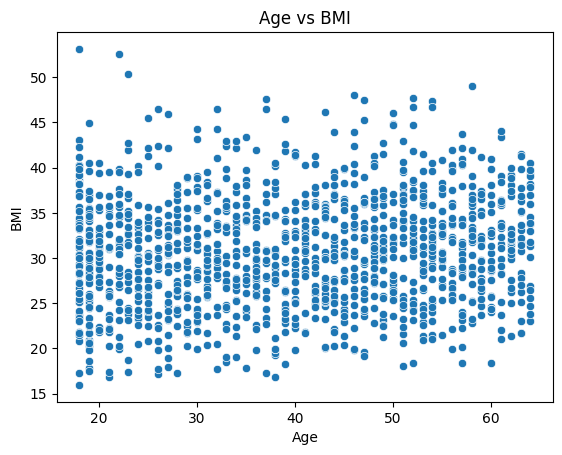

In [23]:
#Relationship between age and bmi
sns.scatterplot(x='age', y='bmi', data=ins)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age vs BMI')
plt.show()

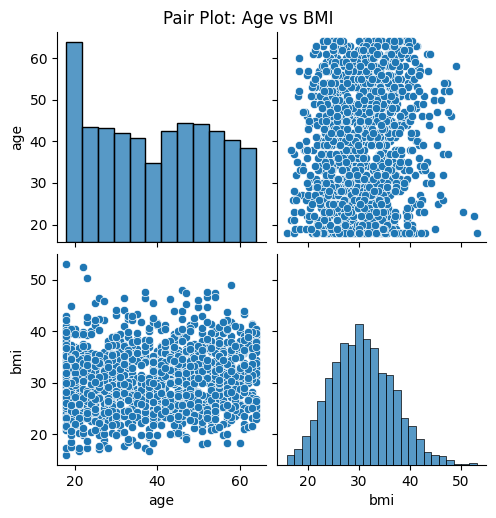

In [24]:
sns.pairplot(ins, vars=['age', 'bmi'])
plt.suptitle('Pair Plot: Age vs BMI', y=1.02)
plt.show()

In [25]:
correlation = ins['age'].corr(ins['bmi'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.1092718815485352


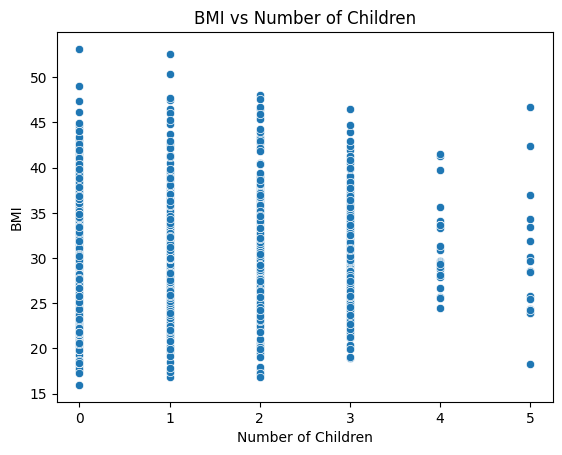

In [26]:
#Relationship between BMI and Children count
sns.scatterplot(x='children', y='bmi', data=ins)
plt.xlabel('Number of Children')
plt.ylabel('BMI')
plt.title('BMI vs Number of Children')
plt.show()

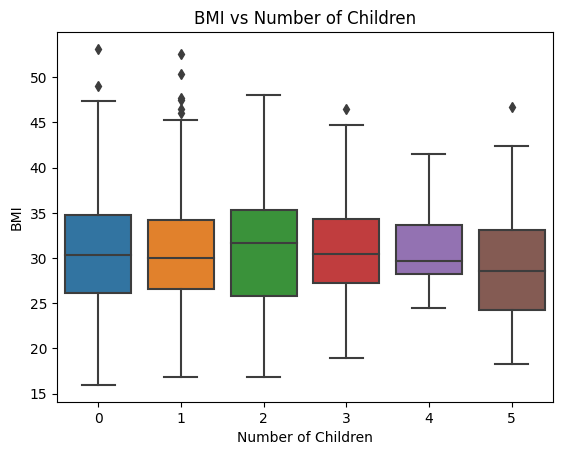

In [27]:
sns.boxplot(x='children', y='bmi', data=ins)
plt.xlabel('Number of Children')
plt.ylabel('BMI')
plt.title('BMI vs Number of Children')
plt.show()

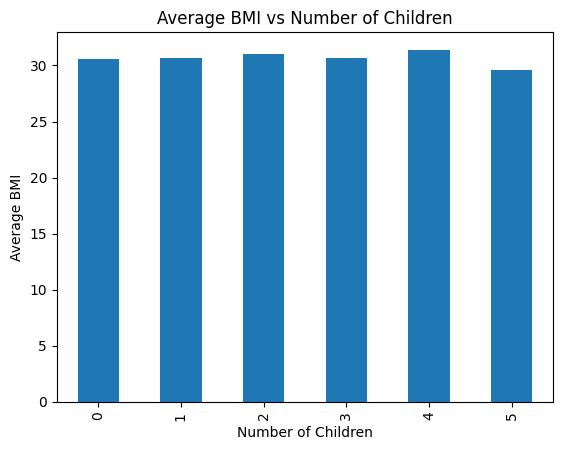

In [28]:
average_bmi_by_children = ins.groupby('children')['bmi'].mean()
average_bmi_by_children.plot(kind='bar')
plt.xlabel('Number of Children')
plt.ylabel('Average BMI')
plt.title('Average BMI vs Number of Children')
plt.show()

In [29]:
#Doesnt have a strong relationship.
correlation = ins['bmi'].corr(ins['children'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.012758900820673815


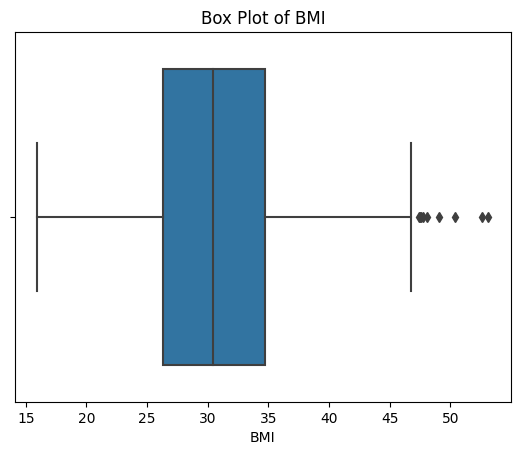

In [30]:
#BMI BOXPLOT
sns.boxplot(x=ins['bmi'])
plt.xlabel('BMI')
plt.title('Box Plot of BMI')
plt.show()

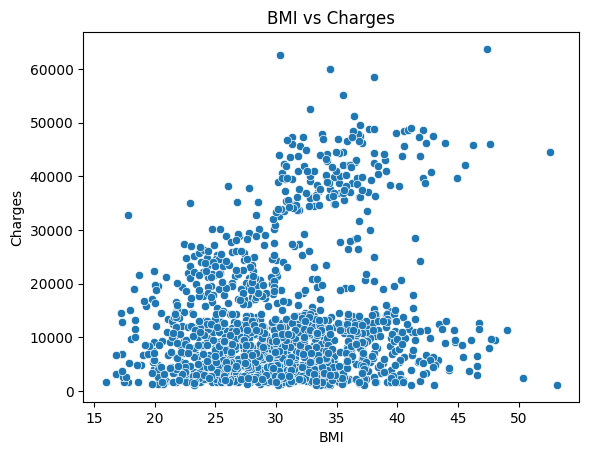

In [31]:
#Relation between BMI vs Charges
sns.scatterplot(x='bmi', y='charges', data=ins)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges')
plt.show()

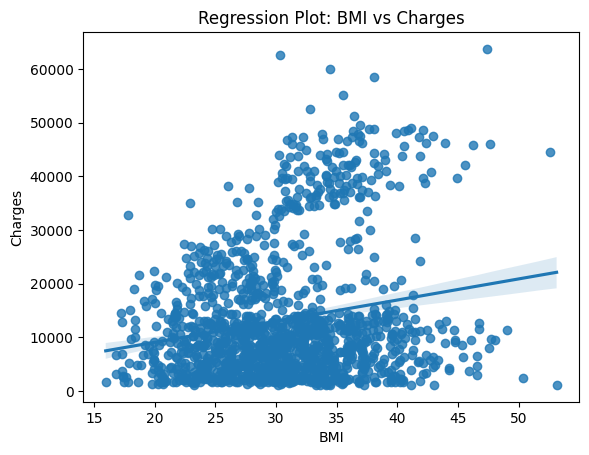

In [32]:
sns.regplot(x='bmi', y='charges', data=ins)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Regression Plot: BMI vs Charges')
plt.show()

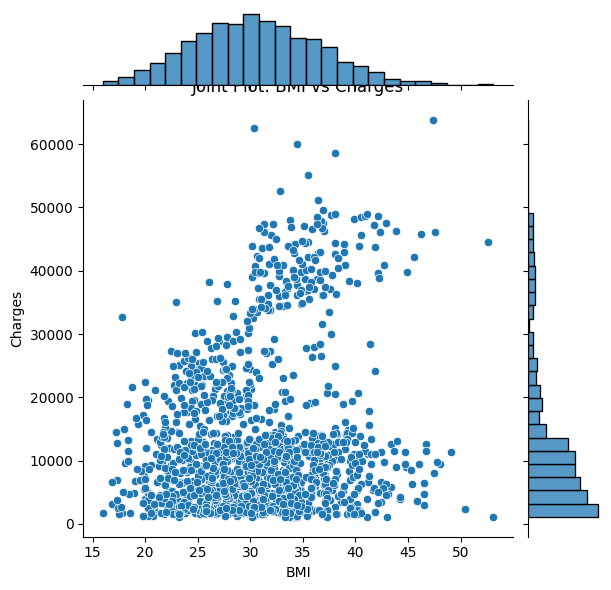

In [33]:
sns.jointplot(x='bmi', y='charges', data=ins, kind='scatter')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Joint Plot: BMI vs Charges')
plt.show()

In [34]:
correlation = ins['bmi'].corr(ins['charges'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.19834096883362895


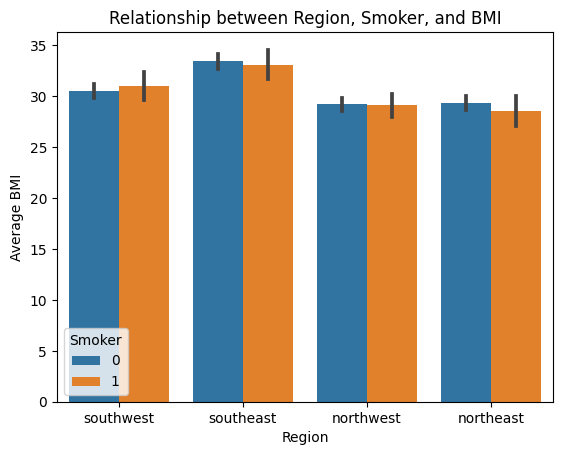

In [35]:
#Relationship between Region, Smoker, and BMI
sns.barplot(x='region', y='bmi', hue='smoker', data=ins)
plt.xlabel('Region')
plt.ylabel('Average BMI')
plt.title('Relationship between Region, Smoker, and BMI')
plt.legend(title='Smoker')
plt.show()

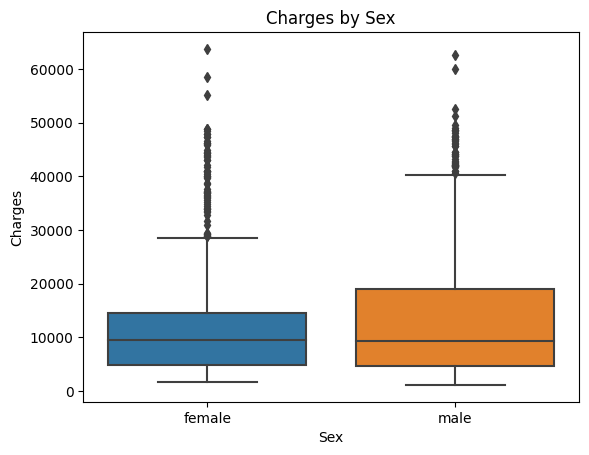

In [36]:
sns.boxplot(x='sex', y='charges', data=ins)
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.title('Charges by Sex')
plt.show()

In [47]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# One-Hot Encode 'region'
# This step converts the categorical feature 'region' into numerical using one-hot encoding.
# It creates binary columns for each region, dropping the first column to avoid multicollinearity.

ins = pd.get_dummies(ins, columns=['region'], drop_first=True)

KeyError: ignored

In [48]:
# One-Hot Encode 'sex'
# This step converts the categorical feature 'sex' into numerical using one-hot encoding.
# It creates a binary column for the 'sex' feature, dropping the first column to avoid multicollinearity.
ins = pd.get_dummies(ins, columns=['sex'], drop_first=True)


KeyError: ignored

In [49]:
from sklearn.model_selection import train_test_split
# Split the Data into Train and Test Sets
# Here, we're splitting the features (X) and the target variable (y) into training and testing sets.
# test_size=0.2 means that 20% of the data will be used for testing and 80% for training.
# random_state=42 is used for reproducibility, ensuring the same split if the code is run again.

X = ins.drop(['charges'], axis=1)
y = ins['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.preprocessing import MinMaxScaler
# Min-Max Scaling
# Min-Max scaling transforms the features to a specified range (usually [0, 1]).
# It's important to scale the features to ensure they're on a similar scale,
# which can improve the performance of some machine learning algorithms.
scaler = MinMaxScaler()
# Scale the training features
X_train_scaled = scaler.fit_transform(X_train)
# Scale the testing features using the same scaler used for training features
X_test_scaled = scaler.transform(X_test)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Linear Regression Model
# Create a LinearRegression model and fit it to the scaled training data.

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
# Make predictions on the scaled test data
y_pred = lr.predict(X_test_scaled)
# Calculate the Mean Squared Error (MSE) to evaluate the model's performance.
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression MSE:", mse)



Linear Regression MSE: 33596915.85136149


In [52]:
from sklearn.ensemble import RandomForestRegressor
# Random Forest Regression Model
# Create a RandomForestRegressor model and fit it to the scaled training data.
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
# Make predictions on the scaled test data
y_pred = rf.predict(X_test_scaled)
# Calculate the Mean Squared Error (MSE) to evaluate the model's performance.
mse = mean_squared_error(y_test, y_pred)
print("Random Forest Regression MSE:", mse)


Random Forest Regression MSE: 21088050.01214946


In [53]:
from sklearn.ensemble import GradientBoostingRegressor
# Gradient Boosting Regression Model
# Create a GradientBoostingRegressor model and fit it to the scaled training data.
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train_scaled, y_train)
# Make predictions on the scaled test data
y_pred = gb.predict(X_test_scaled)
# Calculate the Mean Squared Error (MSE) to evaluate the model's performance.
mse = mean_squared_error(y_test, y_pred)
print("Gradient Boosting Regression MSE:", mse)


Gradient Boosting Regression MSE: 18740277.703438833


In [54]:
from sklearn.model_selection import cross_val_score
import numpy as np

# List of models
models = [lr, rf, gb]

# Perform cross-validation for each model
for model in models:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)  # Convert negative MSE scores to RMSE

    print(f"Model: {model.__class__.__name__}")
    print(f"RMSE Scores: {rmse_scores}")
    print(f"Average RMSE: {np.mean(rmse_scores)}")
    print("------")


Model: LinearRegression
RMSE Scores: [6334.96905353 5663.6591115  5992.51101164 6825.71740716 5918.61313625]
Average RMSE: 6147.093944016904
------
Model: RandomForestRegressor
RMSE Scores: [5071.26109951 4047.77733626 5173.453211   5458.94872265 5063.63884916]
Average RMSE: 4963.015843714719
------
Model: GradientBoostingRegressor
RMSE Scores: [4886.66727065 3595.45632474 4806.38117466 5357.58175156 4822.72671681]
Average RMSE: 4693.762647683057
------


In [55]:
#Best Performing Model -GradientBoostingRegressor-

In [56]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Create the model
gb_model = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best Estimator: GradientBoostingRegressor(learning_rate=0.01, n_estimators=300, random_state=42)


In [57]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def mean_percentage_error(y_true, y_pred):
    return np.mean((y_true - y_pred) / y_true) * 100

# Predict on the test set using the best estimator
y_pred = best_estimator.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mpe = mean_percentage_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("Mean Percentage Error (MPE):", mpe)


Mean Squared Error (MSE): 19591873.300824985
Root Mean Squared Error (RMSE): 4426.270811961802
Mean Absolute Error (MAE): 2641.4973155274656
R-squared (R2): 0.8738033276499709
Mean Percentage Error (MPE): -29.78679253667387


In [58]:

y_pred = model.predict(X_test)

# Comparison between predicted and actual data
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)
#Model kötü çok fazla şey denedim iyileştirmek için ama beceremedim hocam.

           Actual     Predicted
764    9095.06825  31013.028258
887    5272.17580  14153.680600
890   29330.98315  48168.909588
1293   9301.89355  30664.053823
259   33750.29180  49506.418474
...           ...           ...
109   47055.53210  47637.230189
575   12222.89830  14153.680600
535    6067.12675  30308.425333
543   63770.42801  48020.233457
846    9872.70100  29266.313769

[268 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


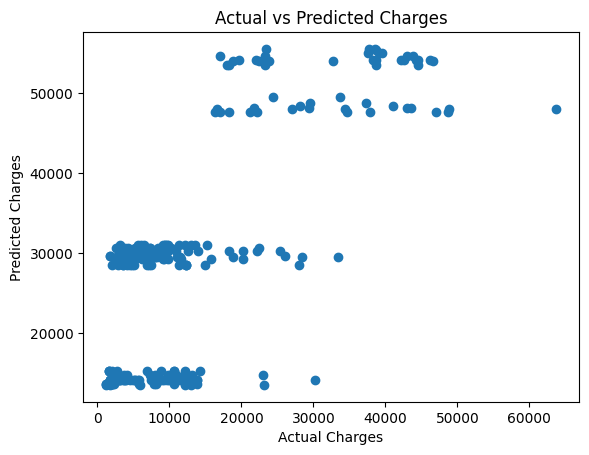

In [59]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()
